# Convolutional Neural Network example

In [37]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D, Conv2D

from keras.utils import np_utils
import requests
requests.packages.urllib3.disable_warnings()
import ssl

In [38]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [46]:
y_train[0]

5

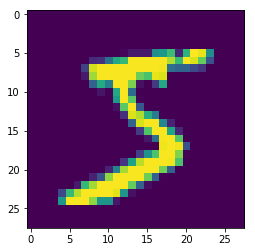

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [41]:

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [42]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [43]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape)

(60000, 10)


In [45]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))

In [30]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [33]:
history = model.fit(X_train, Y_train, 
          batch_size=32,validation_split=0.25, epochs=10, verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 64s 1ms/step - loss: 0.2454 - acc: 0.9241 - val_loss: 0.0724 - val_acc: 0.9783
Epoch 2/10
45000/45000 [==============================] - 67s 1ms/step - loss: 0.0959 - acc: 0.9717 - val_loss: 0.0533 - val_acc: 0.9837
Epoch 3/10
45000/45000 [==============================] - 70s 2ms/step - loss: 0.0696 - acc: 0.9783 - val_loss: 0.0618 - val_acc: 0.9827
Epoch 4/10
45000/45000 [==============================] - 69s 2ms/step - loss: 0.0589 - acc: 0.9819 - val_loss: 0.0437 - val_acc: 0.9875
Epoch 5/10
45000/45000 [==============================] - 71s 2ms/step - loss: 0.0505 - acc: 0.9842 - val_loss: 0.0426 - val_acc: 0.9890
Epoch 6/10
45000/45000 [==============================] - 65s 1ms/step - loss: 0.0442 - acc: 0.9862 - val_loss: 0.0455 - val_acc: 0.9875
Epoch 7/10
45000/45000 [==============================] - 70s 2ms/step - loss: 0.0419 - acc: 0.9871 - val_loss: 0.0415 - val_acc

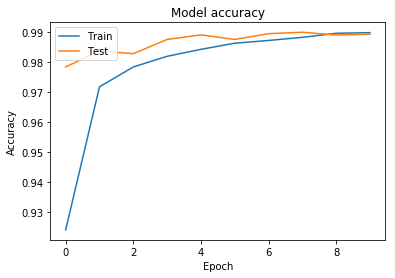

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [54]:
score

[0.02392874485144712, 0.9923]

In [23]:
preds = model.predict(x=X_test[:10])

In [24]:
np.argmax(preds, axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [26]:
np.argmax(Y_test[:10], axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

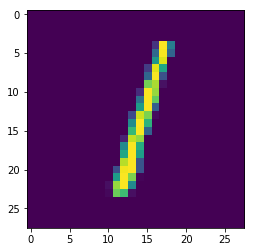

In [36]:
plt.imshow(X_test.reshape(10000,28,28)[2])